<a href="https://colab.research.google.com/github/erikamarchi/bootcamp-alura-data-science/blob/main/modulo-01/Dados_Hospitalares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configurações iniciais

##Imports

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

##Configuração de ponto flutuante

In [42]:
pd.options.display.float_format = "{:.2f}".format

##Configuração dos gráficos

In [43]:
import seaborn as sns

In [44]:
sns.set_theme(style="whitegrid")
#paleta de cores acessíveis
sns.color_palette("viridis", as_cmap=True)

#Obtendo e explorando dados do datasus a partir do ano de 2008


In [45]:
import pandas as pd

In [46]:
dados = pd.read_csv("/content/A160324189_28_143_208.csv", 
                    encoding="ISO-8859-1", 
                    skiprows = 3, 
                    sep=";", 
                    skipfooter=12,
                    thousands=".", 
                    decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [47]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

#Tratamento de dados

In [48]:
dados.replace({'-': '0.00'}, inplace=True)

In [49]:
type(dados['2020/Ago'][0])

str

In [50]:
dados['2020/Ago'] = dados['2020/Ago'].astype(float)

In [51]:
type(dados['2020/Ago'][0])

numpy.float64

##Descarta colunas de anos que não possuiam as informações 


*   cria e trata dataframe **usaveis**




In [52]:
colunas_utilizaveis = dados.mean().index.tolist()
colunas_utilizaveis.insert(0, "Unidade da Federação")

In [53]:
usaveis = dados[colunas_utilizaveis]

In [54]:
usaveis = usaveis.set_index("Unidade da Federação")

In [55]:
usaveis = usaveis.drop("Total", axis=1)

#Gráfico de gastos por estado brasileiro

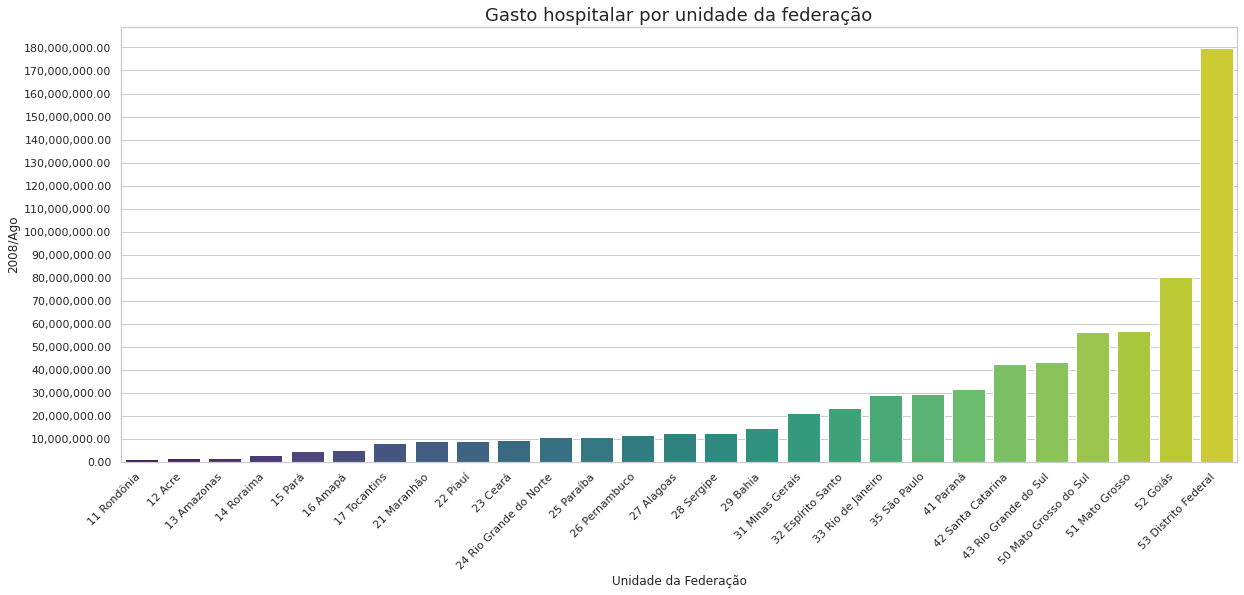

In [73]:
import matplotlib.ticker as ticker

ax = sns.barplot(data=dados.sort_values(["2008/Ago"]),
            x='Unidade da Federação',
            y='2008/Ago',
            palette='viridis')

ax.set_title('Gasto hospitalar por unidade da federação',fontsize=18)
ax.figure.set_size_inches(20,8)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.yaxis.set_ticks([i for i in range(0, int(max(dados['2008/Ago'])+5000000), 10000000)])
ax.set_xticklabels(dados['Unidade da Federação'],rotation=45,ha='right');

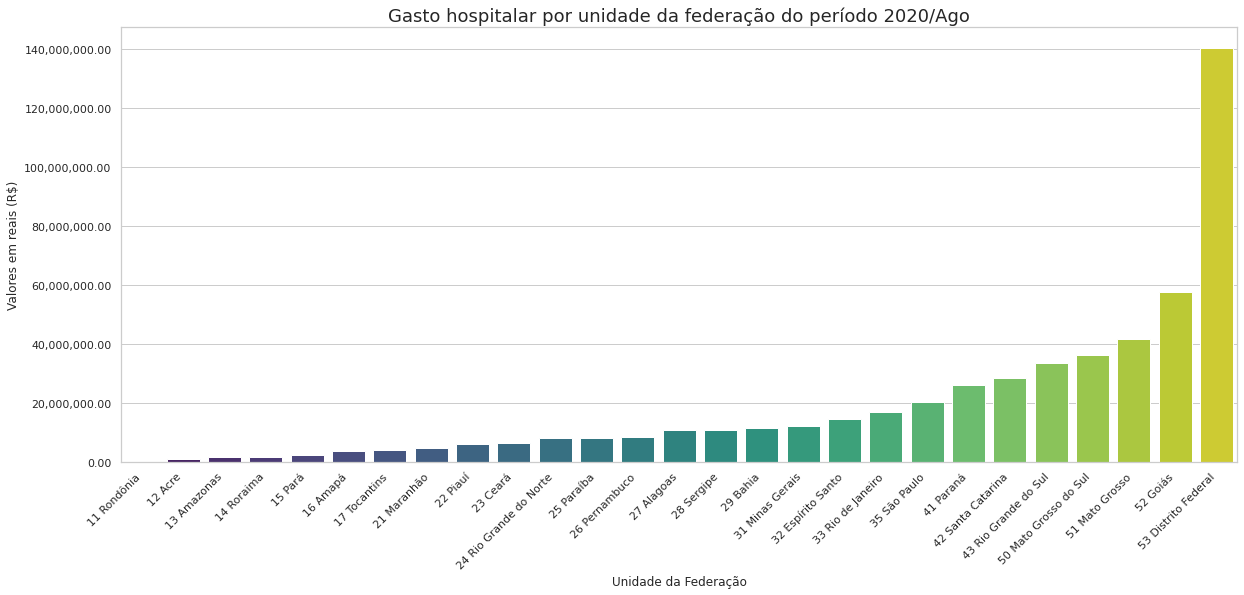

In [80]:
ax = sns.barplot(data=dados.sort_values(["2020/Ago"]),
            x='Unidade da Federação',
            y='2020/Ago',
            palette='viridis')

ax.set_title('Gasto hospitalar por unidade da federação do período 2020/Ago',fontsize=18)
ax.figure.set_size_inches(20,8)
ax.set_ylabel("Valores em reais (R$)")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.yaxis.set_ticks([i for i in range(0, int(max(dados['2020/Ago'])+5000000), 20000000)])
ax.set_xticklabels(dados['Unidade da Federação'],rotation=45,ha='right');

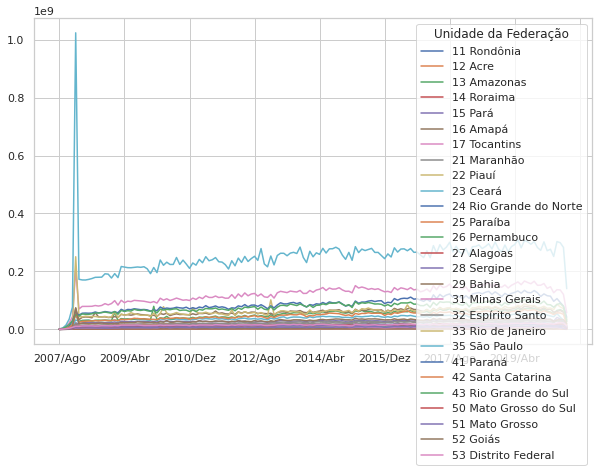

In [64]:
usaveis.T.plot(figsize=(10,6))

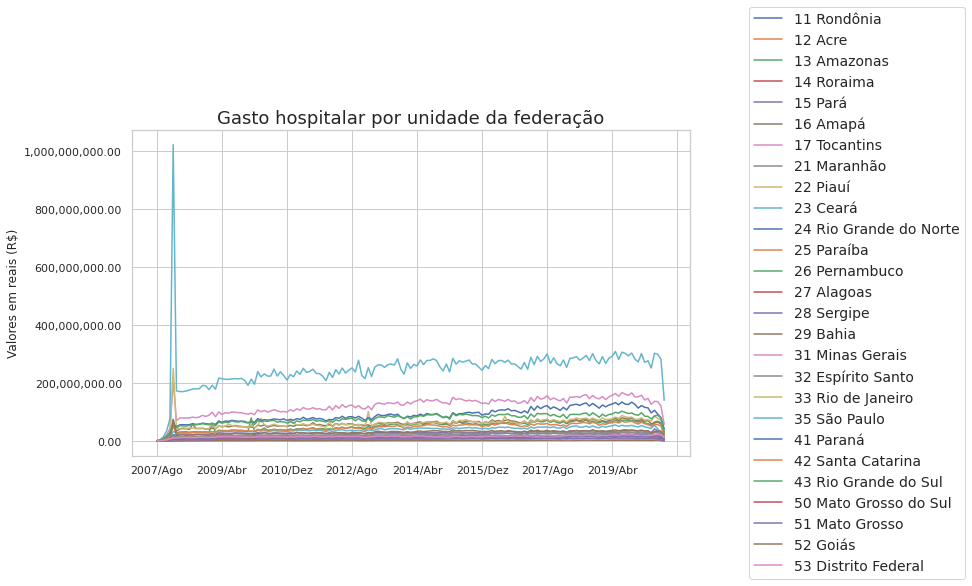

In [89]:
ax = usaveis.T.plot(figsize=(10,6))
ax.legend(loc='center', bbox_to_anchor=(1.3,0.5), fontsize=14)
ax.set_title('Gasto hospitalar por unidade da federação',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.figure.set_size_inches(10,6);

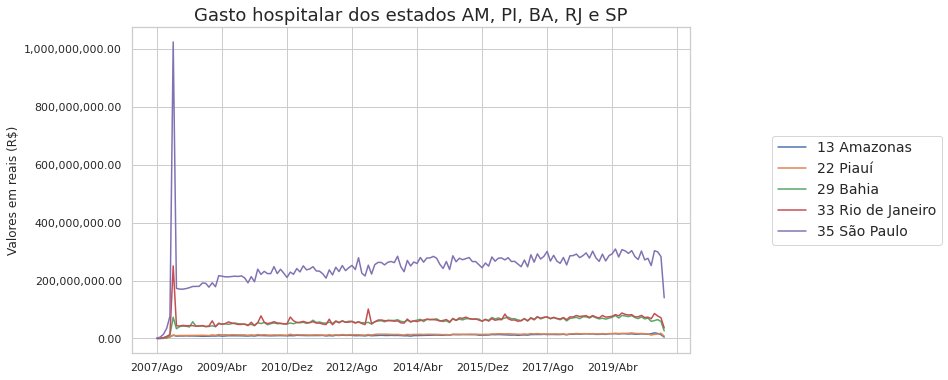

In [99]:
estados_para_analise = ['13 Amazonas','22 Piauí','29 Bahia','33 Rio de Janeiro', '35 São Paulo']
ax = usaveis.T[estados_para_analise].plot(figsize=(10,6))

ax.legend(loc='center', bbox_to_anchor=(1.3,0.5), fontsize=14)
ax.set_title('Gasto hospitalar dos estados AM, PI, BA, RJ e SP',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.figure.set_size_inches(10,6);